# OpenCV Cheatsheet

Cheatsheet Goals: Quick Overview of OpenCV Functions used in this course

 # Image Loading, Display, Saving

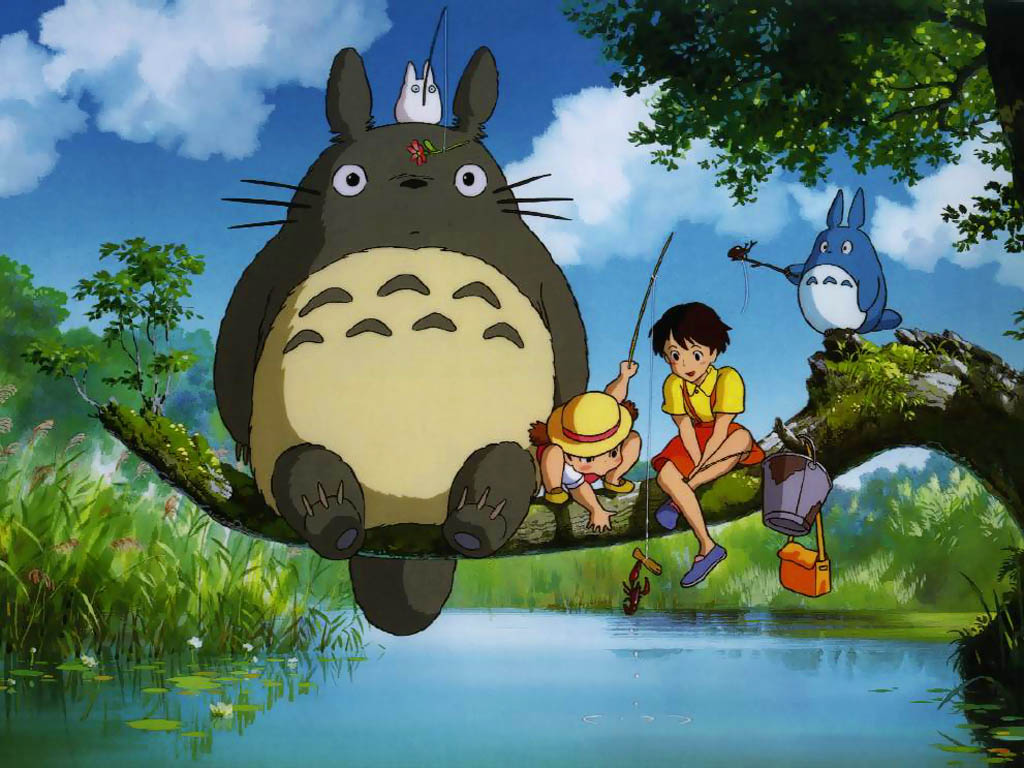

In [3]:
import cv2 # For Image Loading
import os # For downloading images from the internet

from google.colab.patches import cv2_imshow  # Allows OpenCV to show images in Google CoLab

os.system('curl -O https://studioghiblimovies.com/wp-content/uploads/2014/11/totoro.jpg')  # Download image from internet as long as you have a link

image = cv2.imread("totoro.jpg") # Read image file with OpenCV, note the filename matches the last part of the link above.

cv2_imshow(image) # Display/Show the image

Quick way to save:

Windows: Right-Click on the image, then choose something that says "save" (depends on the browser).

Mac: Two-Finger Tap on image, then choose the option that has "save" in it.

For other ways to Upload/Download files with Google CoLab:

https://colab.research.google.com/notebooks/io.ipynb

# Image Thresholding

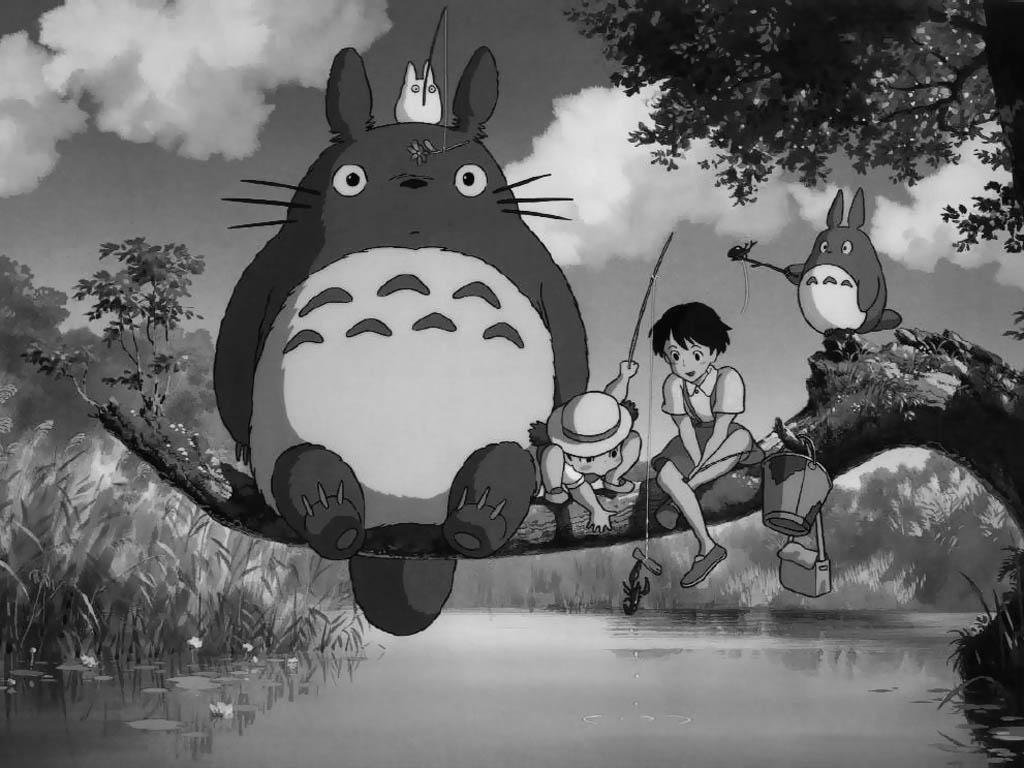

In [4]:
# Using previous image

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

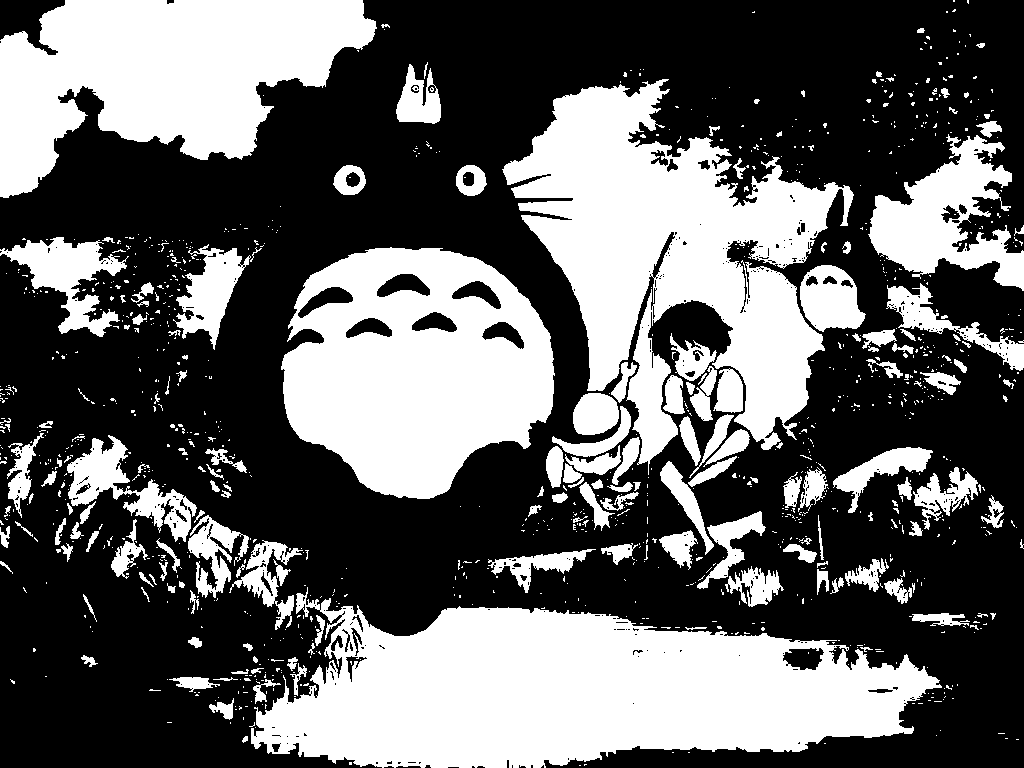

In [7]:
# Apply Threshold

# White becomes black, black become black (Note the cv2.THRESH_BINARY variable)
# Any value below 127 becomes 0 (black), anything above 127 becomes 255 (white)
thresh = 127

ret,thresh1 = cv2.threshold(gray_image, thresh, 255, cv2.THRESH_BINARY)


cv2_imshow(thresh1)


In [ ]:
# Black become white, white become black. (Note the cv2.THRESH_BINARY_INV variable)
# Any value below 127 becomes 255 (white), anything above 127 becomes 0 (black)
# Notice how this is the inverted (INV) of the previous one.
thresh = 127

ret,thresh2 = cv2.threshold(gray_image, thresh, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh2)


Links:

https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html

# Image Contours

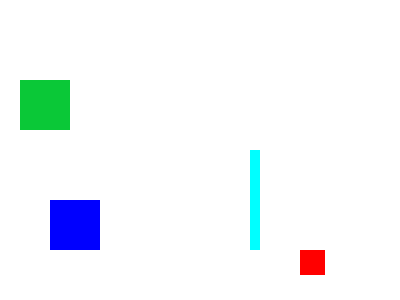

In [10]:
# For easier viewing, let's use boxes

# importing the libraries
import numpy as np

#Set image dimensions and color channels
XREZ=400
YREZ=300
COLOR_CHANNELS=3

# create array for image    
im=np.zeros((YREZ,XREZ,COLOR_CHANNELS),dtype='uint8') #

#position 1 size 1
W=50;   H=50;
xA0=20;   xA1=xA0+W;
yA0=80;   yA1=yA0+H;

#position 2 size 1
W=50;   H=50;
xB0=50;   xB1=xB0+W;
yB0=200;   yB1=yB0+H;

#position 3 shape 2
W=10;   H=100;
xC0=250;   xC1=xC0+W;
yC0=150;   yC1=yC0+H;

#position 4 size 2
W=25;   H=25;
xD0=300;   xD1=xD0+W;
yD0=250;   yD1=yD0+H;

WHITE_CH=[0,1,2]

im[:,:,:]=255; # make all pixels white (most microscopy images are light background and dark image)  #
#im[:,:,:]=0 #black backgound
#add color to the squares
im[yA0:yA1,xA0:xA1,WHITE_CH]=[55,200,10]
im[yB0:yB1,xB0:xB1,WHITE_CH]=[255,0,0]
im[yC0:yC1,xC0:xC1,WHITE_CH]=[255,255,0]
im[yD0:yD1,xD0:xD1,WHITE_CH]=[0,0,255]

# displaying the image
cv2_imshow(im)


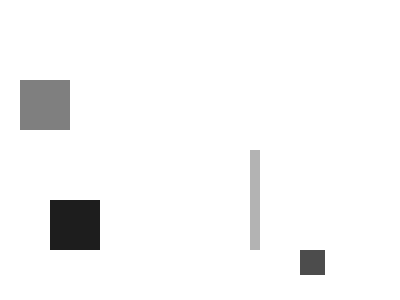

In [11]:
# Convert to Grayscale
gray_box_image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray_box_image)

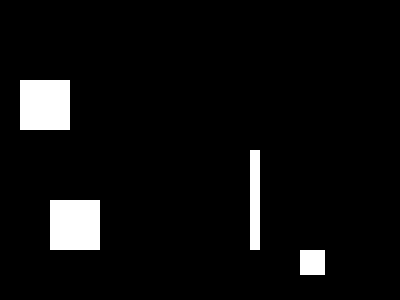

In [20]:
# Apply Threshold, we want our objects of interest to be white and background to be black.

# Black becomes white, white become black (Note the cv2.THRESH_BINARY_INV variable)
# Any value below 180 becomes 255 (white), anything above 180 becomes 0 (black)
thresh = 180

ret, binary_image = cv2.threshold(gray_box_image, thresh, 255, cv2.THRESH_BINARY_INV)

cv2_imshow(binary_image)

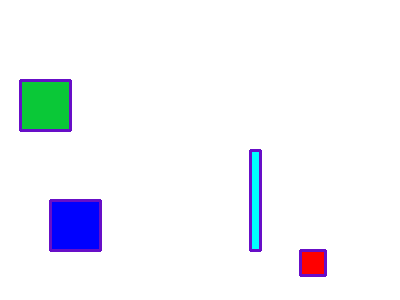

In [27]:
# detect objects in binary image

# Get external (cv2.RETR_EXTERNAL) contours only, simple vertices only (cv2.CHAIN_APPROX_SIMPLE)
contourList, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # all countour points, uses more memory

image_edit = im.copy()
border_color = (200, 14, 104) # Purple, BGR format
thick = 2

# Draw contours on found objects

for objContour in contourList:
    # Create a bounding rectangle using the objContour points, store in a list called PO (Points of Object)
  PO = cv2.boundingRect(objContour)

  # Extract the values from PO
  # PO list order: x-origin, y-origin, rectangle width, and rectangle height
  # Origin is the top-left of the rectangle
  x0=PO[0]; y0=PO[1]; w=PO[2]; h=PO[3]

  # Optional: print out the results to see how different they are (uncomment the below line)
  # print(f"x0: {x0}, y0: {y0}, w: {w}, h: {h}")

  # Draw the rectangle on grayIM starting at the top-left at (x0,y0) and
  # ending at the bottom right (x0+w,y0+h).
  # Use the gray border_color with a thickness of 3 pixels.
  cv2.rectangle(image_edit, (x0,y0), (x0+w,y0+h), border_color, thick)

cv2_imshow(image_edit)

Use RGB Color Picker to help on color:
https://rgbacolorpicker.com

*Note: It says RGB, but follow the where the B, G, and R goes.